In [1]:
# Imports

# How to install GDAL ++ on Ubuntu:  https://mothergeo-py.readthedocs.io/en/latest/development/how-to/gdal-ubuntu-pkg.html
# import rioxarray  # Installation: conda install -c conda-forge rioxarray

# Standard modules
import numpy as np
import matplotlib.pyplot as plt
import os
import copy

# Local modules
import hyspec_io, image_render

In [2]:
# Paths
example_hyspec_file = '/media/mha114/Massimal/Larvik_Olberg/Hyperspectral/20210825/OlbergAreaS/4_Rad_Georef_SGC/OlbergholmenS_Pika_L_17-Radiance From Raw Data-Georectify Airborne Datacube.bip.hdr'
output_classification_image = '/media/mha114/Massimal/Larvik_Olberg/Hyperspectral/Test_ExportGeorefClassification/OlbergholmenS_Pika_L_17_TestClassification.bip.hdr'

In [3]:
#%% Import data
(im,wl,rgb_ind,metadata) = hyspec_io.load_envi_image(example_hyspec_file)

In [4]:
#%% Manipulate a single band from the image to create a "dummy" classification
N_classes = 5
ex_band = np.expand_dims(im[:,:,100],2)
im_norm = ex_band - ex_band.min()
im_norm = im_norm / im_norm.max()
im_class = np.round(im_norm*N_classes)    # "Integer" image in range [0,N_classes]

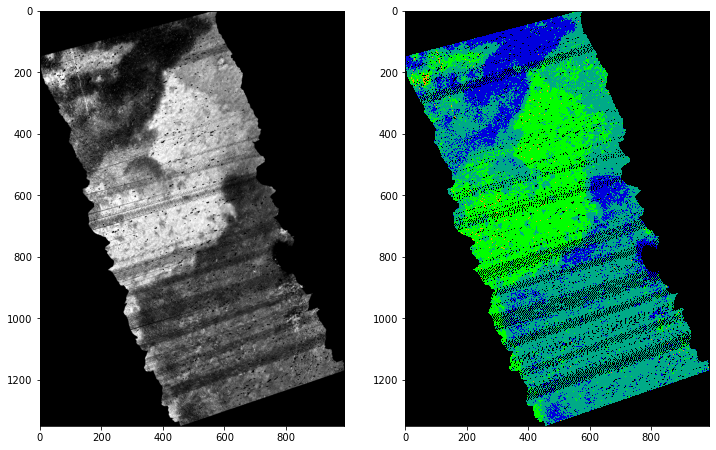

In [5]:
# Show image band and dummy clasification
fig,ax = plt.subplots(ncols=2,figsize=(12,12))
ax[0].imshow(image_render.percentile_stretch(ex_band),cmap='gray')
ax[1].imshow(im_class,interpolation='none',cmap='nipy_spectral')
plt.show()

In [6]:
# Convert single-channel classification to 3-channel RGB image
cmap = plt.get_cmap('nipy_spectral')                      # Get colormap object
im_class_rgb = cmap(np.squeeze(im_class/im_class.max()))  # Divide by max to scale range to [0,1], look up RGB values
im_class_rgb = im_class_rgb[:,:,0:3]                      # Remove fourth (alpha) channel, not relevant

In [7]:
# Copy / update relevant metadata
im_class_metadata = {} # Empty dict
im_class_metadata['samples'] = metadata['samples']
im_class_metadata['lines'] = metadata['lines']
im_class_metadata['bands'] = 3
im_class_metadata['file type'] = metadata['file type']
im_class_metadata['interleave'] = metadata['interleave']
im_class_metadata['byte order'] = metadata['byte order']
im_class_metadata['map info'] = metadata['map info']


In [8]:
# Show metadata for output file
im_class_metadata

{'samples': '990',
 'lines': '1350',
 'bands': 3,
 'file type': 'ENVI Standard',
 'interleave': 'bip',
 'byte order': '0',
 'map info': ['UTM',
  '1.000',
  '1.000',
  '565038.0737685384',
  '6541351.535559797',
  '0.045',
  '0.045',
  '32',
  'North',
  'WGS-84',
  'units  meters',
  'rotation  0.000']}

In [10]:
# Save to ENVI file
hyspec_io.save_envi_image(header_filename=output_classification_image,
                          image = im_class_rgb,
                          metadata=im_class_metadata,
                          dtype=im_class_rgb.dtype)